# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint


import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

596

In [3]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# creating empty lists to fill API data.
city_name=[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
print("Begining Data Retrieval")
print('-'*29)

count = 1  # counter to count the number of call for APIs. 
sets = 1  # counter to count the number of call sets.

def get_weather(city, api_key):
   
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q":city
    }
    r = requests.get(url,params=payload)
    if r.status_code == 200:
        
        print(f"Procssing Record {count} of {sets} | {city}")
        
        return r.json()
    else: 
        print("City not found. Skipping...")
        return None
    print('-'*35)

# getting data in json format.
all_cities_json = []
for city in cities:
    result = get_weather(city,api_key)
#     if result:
    count += 1
    sets += 1
    all_cities_json.append(result)
# all_cities_json  

# showing first 2 items of all the data in json format
# all_cities_json[0:2]
print("Data Retrieval Complete")
print('-'*35)

Begining Data Retrieval
-----------------------------
Procssing Record 1 of 1 | ajdabiya
Procssing Record 2 of 2 | tasiilaq
Procssing Record 3 of 3 | cape town
Procssing Record 4 of 4 | sao filipe
Procssing Record 5 of 5 | almaznyy
Procssing Record 6 of 6 | chuy
Procssing Record 7 of 7 | kloulklubed
Procssing Record 8 of 8 | barrow
Procssing Record 9 of 9 | maniitsoq
Procssing Record 10 of 10 | shenkursk
Procssing Record 11 of 11 | tambun
Procssing Record 12 of 12 | general pico
Procssing Record 13 of 13 | rikitea
Procssing Record 14 of 14 | albany
Procssing Record 15 of 15 | clyde river
Procssing Record 16 of 16 | bredasdorp
Procssing Record 17 of 17 | bang saphan
Procssing Record 18 of 18 | busselton
Procssing Record 19 of 19 | garmsar
Procssing Record 20 of 20 | fairbanks
Procssing Record 21 of 21 | gidole
Procssing Record 22 of 22 | banjarmasin
Procssing Record 23 of 23 | umm lajj
City not found. Skipping...
Procssing Record 25 of 25 | bud
Procssing Record 26 of 26 | aklavik
Procss

In [6]:
for e in range(len(all_cities_json)): 
    try:
        city_name.append(all_cities_json[e]['name'])
        country.append(all_cities_json[e]['sys']['country'])
        humidity.append(all_cities_json[e]['main']['humidity'])
        date.append(all_cities_json[e]['dt'])
        cloudiness.append(all_cities_json[e]['clouds']['all'])
        lat.append(all_cities_json[e]['coord']['lat'])
        lng.append(all_cities_json[e]['coord']['lon'])
        max_temp.append(all_cities_json[e]['main']['temp_max'])
        wind_speed.append(all_cities_json[e]['wind']['speed'])
    except:
        city_name.append("") 
        country.append("")
        humidity.append("")
        date.append("")
        cloudiness.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        wind_speed.append("")
        
    
    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict ={
    "City": city_name,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed,
    "Cloudiness":cloudiness
}

In [8]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Cloudiness
0,Ajdabiya,LY,1578329650,64,30.75,20.22,285.87,9.3,52
1,Tasiilaq,GL,1578329149,86,65.61,-37.64,265.74,19.24,97
2,Cape Town,ZA,1578328879,60,-33.93,18.42,294.26,9.8,97
3,Sao Filipe,CV,1578329196,54,14.9,-24.5,296.14,10.07,42
4,Almaznyy,RU,1578329650,93,48.03,40.04,275.15,5,75


In [9]:
weather_df.count()

City          596
Country       596
Date          596
Humidity      596
Lat           596
Lng           596
Max Temp      596
Wind Speed    596
Cloudiness    596
dtype: int64

In [10]:
# save the weather_df to 
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [21]:

# weather_Max_f = (weather_df["Max Temp"] - 273.15)*(9/5)+32
weather_Max_f =[]
for i in weather_df["Max Temp"]:
    if i == "":
        i = 0
        weather_Max_f.append(weather_Max)
    else:
        weather_Max = (i - 273.15)*(9/5)+32 
        weather_Max_f.append(weather_Max)
weather_Max_f = pd.DataFrame(weather_Max_f)[0]


# Here some of the "str" converted to float by subsutiting "str" to "NaN".
weather_df_lat = weather_df['Lat'].replace("",np.nan)

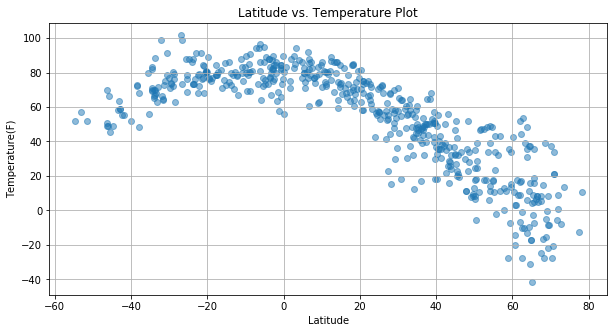

In [20]:
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Temperature Plot')
plt.scatter(weather_df_lat,weather_Max_f, marker = "o",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature"+'(F)')
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

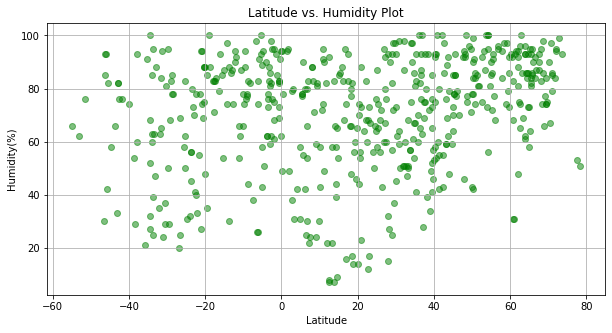

In [26]:
weather_df_hum = weather_df['Humidity'].replace("",np.nan) # converting some "str" to "float64".
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Humidity Plot')
plt.scatter(weather_df_lat,weather_df_hum, marker = "o",alpha=.5, color="g")
plt.xlabel("Latitude")
plt.ylabel("Humidity"+'(%)')
plt.grid(True)
plt.show()


#### Latitude vs. Cloudiness Plot

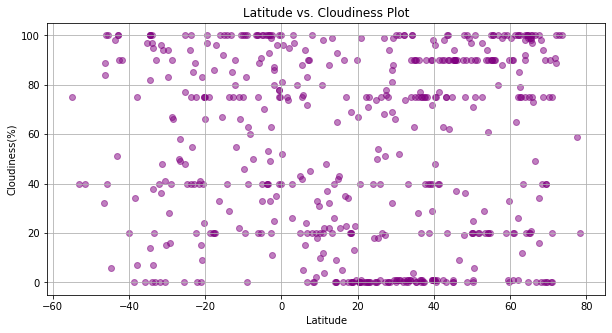

In [28]:
weather_df_cloud = weather_df['Cloudiness'].replace("",np.nan) # converting some "str" to "float64".
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Cloudiness Plot')
plt.scatter(weather_df_lat,weather_df_cloud, marker = "o", alpha=.5,color='purple')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness"+'(%)')
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

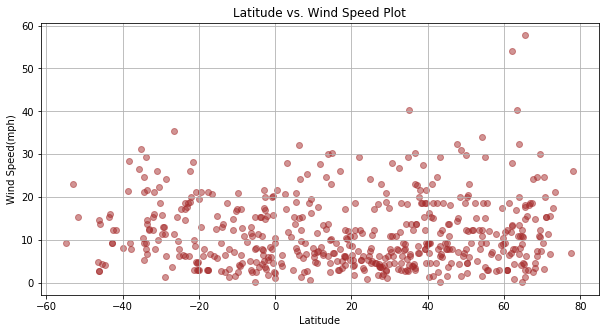

In [29]:
weather_df_wind = weather_df['Wind Speed'].replace("",np.nan) # converting some "str" to "float64".
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Wind Speed Plot')
plt.scatter(weather_df_lat,(weather_df_wind*3), marker = "o",alpha=.5, color='brown')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed"+'(mph)')
plt.grid(True)
plt.show()

## ------- Three obsarvations need to be written as well --------

### 1) As Latitude goes from South to North, Tempeture(F) goes down to negative -40 F. It is getting colder. (By Latitude vs. Temperature Plot)

### 2) As Latitude goes from South to North, Humidity(%) increases more too (By Latitude vs. Humidity Plot).

### 3) As Latitude goes from South to North, Wind Speed tends to increase more  (By Latitude vs. Wind Speed Plot)